In [94]:
import numpy as np

In [153]:
class LinearRegression:
    def __init__(self, X, y, reg='none', lamda=0):   
        self.n = X.shape[1]
        self.d = X.shape[0]
        ones_arr = np.array([np.ones(self.n)])
        self.X = np.concatenate((np.array(X), ones_arr), axis=0).T
        self.y = y
        self.reg = reg
        self.lamda = lamda
        if (self.reg == 'none'):
            self.lamda = 0
        self.W = np.random.rand(self.d+1)
        
        
    def predict(self, X_pre):
        y_pre = self.W.dot(self.X_pre)
        return y_pre
    
    def loss_func(self):
        if (self.reg == 'none'):
            loss = 1/(2*self.n)*np.sum(np.sqrt((self.y - self.X.dot(self.W))**2))
        elif (self.reg == 'l1'):
            loss = 1/(2*self.n)*np.sum(np.sqrt((self.y - self.X.dot(self.W))**2)) + self.lamda*np.sum(np.abs(self.W))
        else:
            loss = 1/(2*self.n)*np.sum(np.sqrt((self.y - self.X.dot(self.W))**2)) + self.lamda*np.sum((self.W)**2)
        return loss
    
    def deviation_func(self):
        if (self.reg == 'none'):
            deviation = (1/self.n)*self.X.T.dot(self.X.dot(self.W) - self.y)
        elif(self.reg == 'l1'):
            deviation = (1/self.n)*self.X.T.dot(self.X.dot(self.W) - self.y) + self.lamda
        else:
            deviation = (1/self.n)*self.X.T.dot(self.X.dot(self.W) - self.y) + 2*self.lamda*self.W
        
        return deviation
    
    def fit(self, momentum=0.9, lr=0.1, n_epochs=100):
        v = 0
        for i in range(0, n_epochs):
            v = momentum*v + lr*self.deviation_func()
            self.W = self.W - v
            print(self.loss_func())
        
        return self.W          
                  
        
        

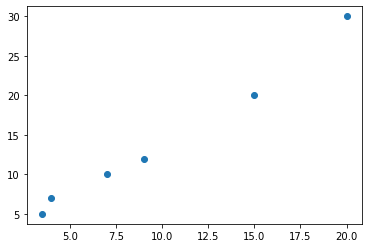

In [154]:
import matplotlib.pyplot as plt

X_train = np.array([[3.5, 4, 7, 9, 15, 20]])
y_train = np.array([5, 7, 10, 12, 20, 30])


plt.scatter(X_train, y_train)

In [155]:
lg = LinearRegression(X_train, y_train, reg='l1', lamda=5)
w = lg.fit(momentum=0.5, lr=0.0001, n_epochs=200)

6
8.561630909844169
8.562529499585445
8.563512833778404
8.564477429694794
8.565368350828354
8.566157376899817
8.566830877219834
8.567383125361609
8.567812637480596
8.568120178147435
8.568307679929275
8.568377660936589
8.568332912453638
8.568176332439153
8.567910837511855
8.567539317015953
8.567064609570714
8.566489491590492
8.565816672150994
8.565048791201212
8.56418841952423
8.563238059599284
8.56220014691629
8.561077051505897
8.559871079560523
8.558584475081249
8.557219421516832
8.555778043377682
8.554262407816337
8.552674526170536
8.551016355467405
8.549289799888458
8.547496712195798
8.545638895120206
8.54371810271194
8.54173604165518
8.539694372547027
8.537594711141987
8.535438629562877
8.533227657479038
8.53096328325272
8.528646955054537
8.526280081948785
8.523864034949451
8.521400148047722
8.518889719211733
8.516334011359328
8.513734253304541
8.51109164067853
8.508407336825636
8.505682473675249
8.50291815259013
8.500115445191817
8.49727539416376
8.49439901403274
8.491487291929221

In [156]:
X_train.shape

(1, 6)

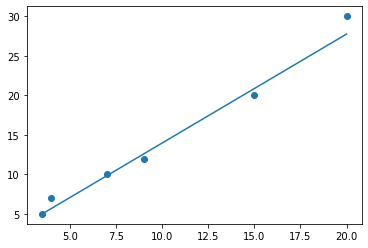

In [157]:
y_ = np.array([3.5*w[0] + w[1], 20*w[0] + w[1]])
x_ = np.array([3.5, 20])

plt.plot(x_, y_)
plt.scatter(X_train, y_train)